# Investigation on Deep Learning Methods for Heart Image Analysis: Progress, Implications, and Prospects for the Future


# Necessary Library Importing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#from scipy.io import loadmat
#import nibabel as nib
#IMAGE PROCESS
import cv2
from PIL import Image
#from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

<ipython-input-2-88d178f32fef>:21: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


# Google Drive Linkage

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# MRI dataset uploading

In [ ]:
"/content/gdrive/MyDrive/data/Task02_Heart/imagesTr"

'/content/gdrive/MyDrive/data/Task02_Heart/imagesTr'

In [ ]:
!pip install --upgrade nibabel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [ ]:
pip install --upgrade numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


# Image Data Augmentation

In [ ]:
import nibabel as nib

In [ ]:
example_image = nib.load("/content/gdrive/MyDrive/3D_Data/imagesTr/la_003.nii.gz")
example_label = nib.load("/content/gdrive/MyDrive/3D_Data/labelsTr/la_003.nii.gz")

In [ ]:
data = example_image.get_fdata()

In [ ]:
Example_ALL_Images = example_image.get_fdata()
Example_ALL_Labels = example_label.get_fdata()

In [ ]:
print(Example_ALL_Images[0].shape)
print(Example_ALL_Labels[0].shape)

(320, 130)
(320, 130)


In [ ]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2].shape)

(320, 130)


In [ ]:
print(Example_ALL_Images.shape[0]//2)

160


In [ ]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2])

[[  0.   0.   0. ... 246. 342. 326.]
 [  0.   0.   0. ... 401. 379. 276.]
 [  0.   0.   0. ... 356. 309. 259.]
 ...
 [  0.   0.   0. ... 624. 383. 160.]
 [  0.   0.   0. ... 589. 423. 260.]
 [  0.   0.   0. ... 495. 420. 335.]]


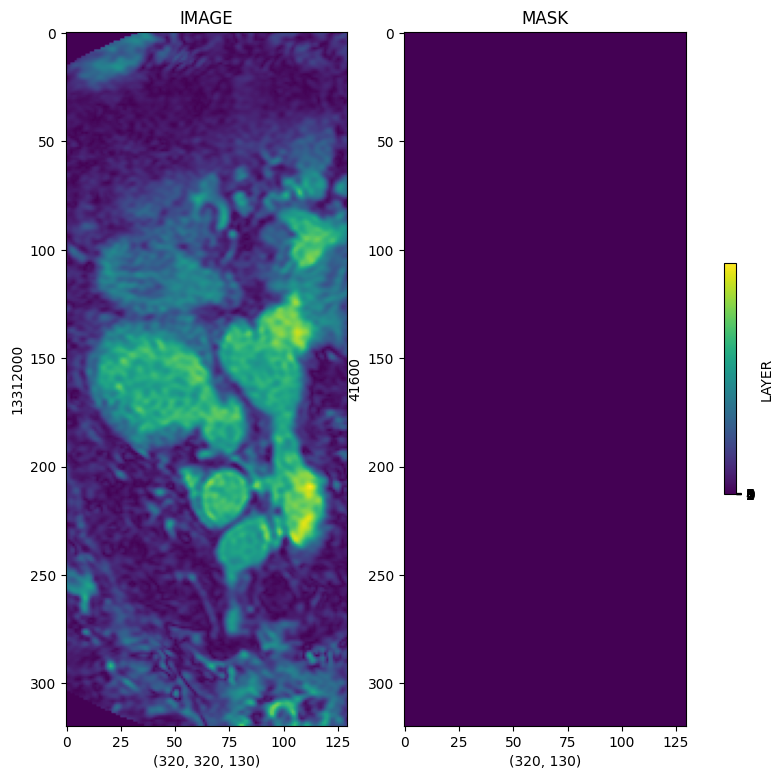

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

figure, axis = plt.subplots(1, 2, figsize=(10, 10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2])
axis[0].set_xlabel(str(Example_ALL_Images.shape))
axis[0].set_ylabel(str(Example_ALL_Images.size))
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2])
axis[1].set_xlabel(str(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape))
axis[1].set_ylabel(str(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size))
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10), label='LAYER')

plt.show()


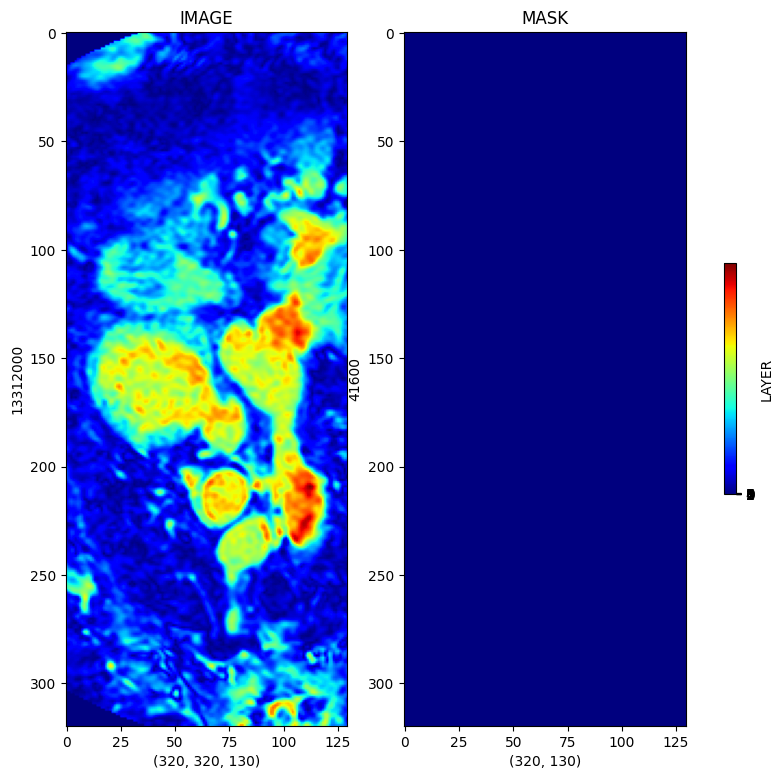

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="jet")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="jet")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

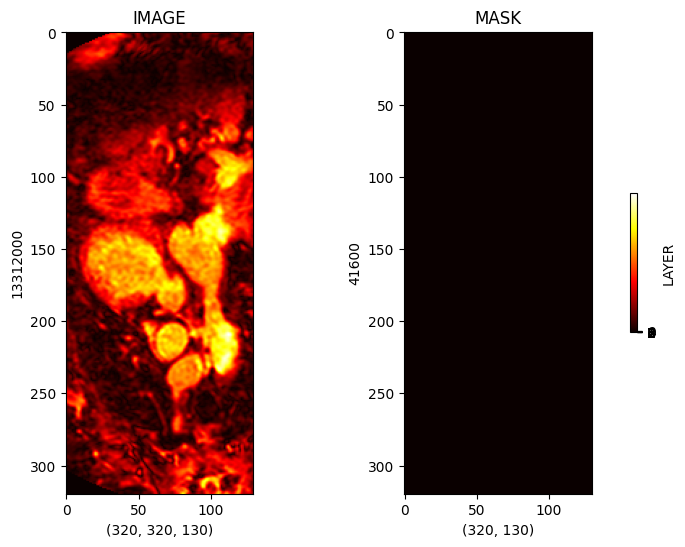

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(10,6))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="hot")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="hot")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

In [ ]:
len(Example_ALL_Labels)

320

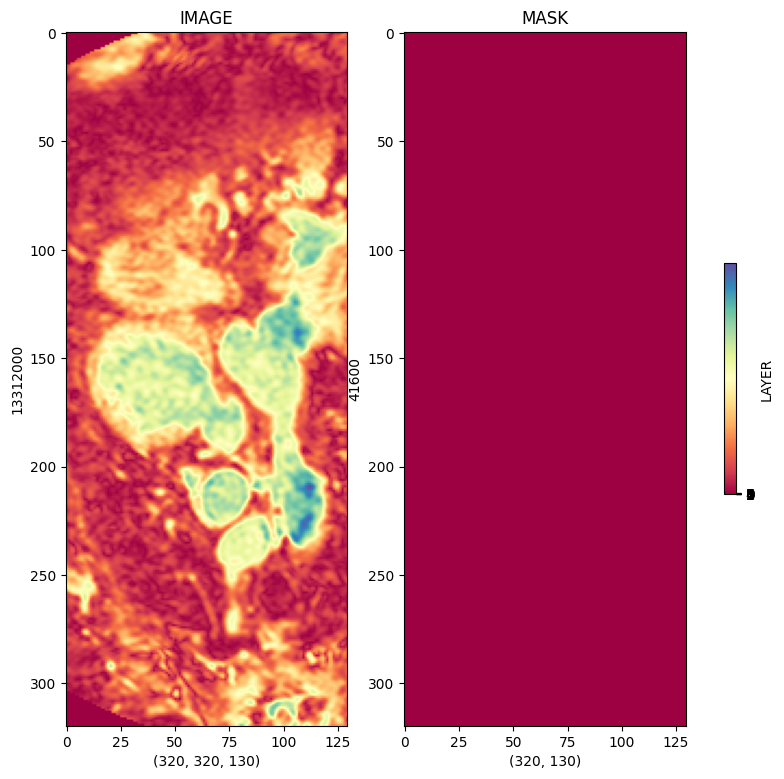

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="Spectral")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="Spectral")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

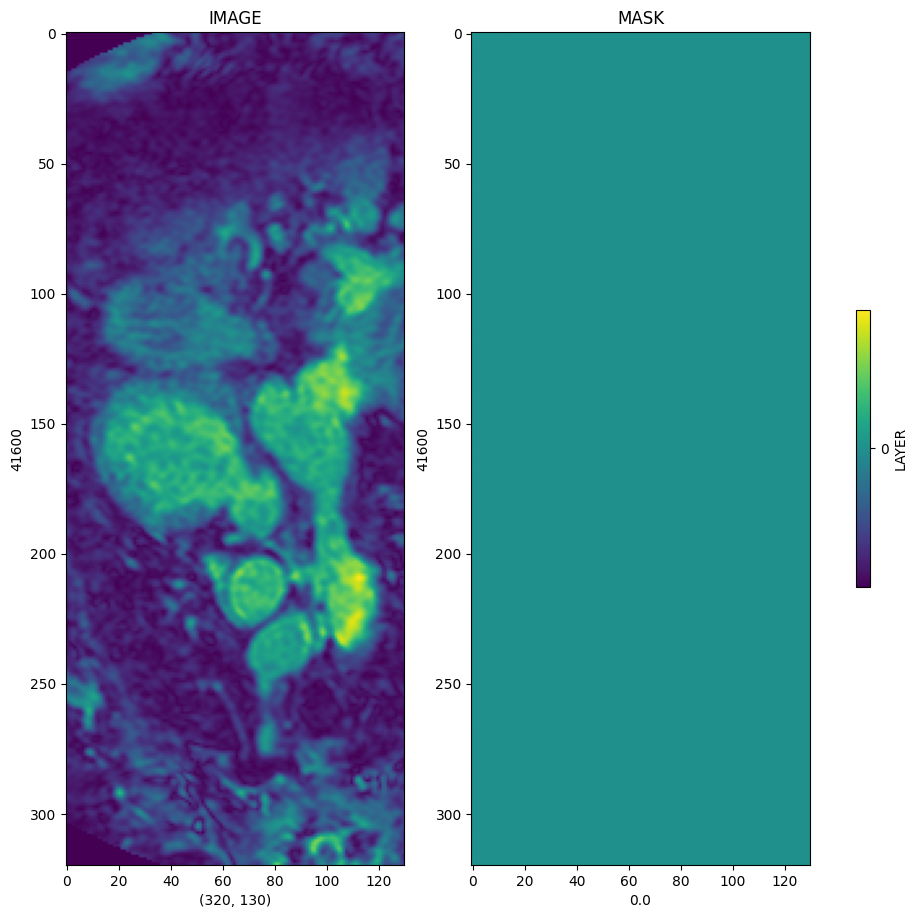

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Example_ALL_Images[Example_ALL_Images.shape[0]//2] / 255.
Picking_Example_Label = Example_ALL_Labels[Example_ALL_Images.shape[0]//2] / 255.

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

Plot_Color_Op = axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

In [ ]:
images_data = list(Path("/content/gdrive/MyDrive/3D_Data/imagesTr/").glob(r"*.nii.gz"))
labels = list(Path("/content/gdrive/MyDrive/3D_Data/labelsTr/").glob(r"*.nii.gz"))


In [ ]:
print(len(images_data))
print(len(labels))

20
20


In [ ]:
images_series = pd.Series(images_data, name="image").astype(str)
labels_series = pd.Series(labels, name="label").astype(str)

In [ ]:
df = pd.concat([images_series, labels_series], axis=1)

In [ ]:
df

,image,label
0,/content/gdrive/MyDrive/3D_Data/imagesTr/la_00...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_00...
1,/content/gdrive/MyDrive/3D_Data/imagesTr/la_01...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_02...
2,/content/gdrive/MyDrive/3D_Data/imagesTr/la_02...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_00...
3,/content/gdrive/MyDrive/3D_Data/imagesTr/la_00...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_01...
4,/content/gdrive/MyDrive/3D_Data/imagesTr/la_00...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_02...
5,/content/gdrive/MyDrive/3D_Data/imagesTr/la_01...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_01...
6,/content/gdrive/MyDrive/3D_Data/imagesTr/la_02...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_02...
7,/content/gdrive/MyDrive/3D_Data/imagesTr/la_02...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_00...
8,/content/gdrive/MyDrive/3D_Data/imagesTr/la_00...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_00...
9,/content/gdrive/MyDrive/3D_Data/imagesTr/la_01...,/content/gdrive/MyDrive/3D_Data/labelsTr/la_01...


In [ ]:
or_1_0 = []
image_list = []
label_list = []

for i_img, i_mask in zip(df["image"].values, df["label"].values):
    reading_train_nii = nib.load(i_img)
    reading_label_nii = nib.load(i_mask)

    x_images = reading_train_nii.get_fdata()
    x_labels = reading_label_nii.get_fdata()

    selecting_image = x_images[x_images.shape[0]//2] / 255.
    selecting_label = x_labels[x_images.shape[0]//2] / 255.

    if np.mean(selecting_label) > 0:
        or_1_0.append(1)
        selecting_image = selecting_image.astype("float32")
        selecting_label = selecting_label.astype("float32")

        image_list.append(selecting_image)
        label_list.append(selecting_label)
    else:
        or_1_0.append(0)


In [ ]:
for i_img, i_mask in zip(df["image"].values, df["label"].values):
    reading_train_nii = nib.load(i_img)
    reading_label_nii = nib.load(i_mask)

    x_images = reading_train_nii.get_fdata()
    x_labels = reading_label_nii.get_fdata()

    selecting_image = x_images[x_images.shape[0]//2] / 255.
    selecting_label = x_labels[x_images.shape[0]//2] / 255.

    print(np.shape(selecting_image))
    print(np.shape(selecting_label))
    print("---" * 20)



(320, 130)
(320, 130)
------------------------------------------------------------
(320, 100)
(320, 110)
------------------------------------------------------------
(320, 110)
(320, 100)
------------------------------------------------------------
(320, 120)
(320, 100)
------------------------------------------------------------
(320, 100)
(320, 109)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 100)
(320, 100)
------------------------------------------------------------
(320, 109)
(320, 120)
------------------------------------------------------------
(320, 130)
(320, 130)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 110)
(320, 110)
------------------------------------------------------------
(320, 110)
(320, 110)
------------------------------------------------------------
(320

In [ ]:
print(or_1_0)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [ ]:
df['target'] = or_1_0

In [ ]:
print(len(image_list))
print(len(label_list))

18
18


In [ ]:
if len(image_list) > 3:
    print(image_list[3].shape)
else:
    print("image_list does not have enough elements")

if len(label_list) > 3:
    print(label_list[3].shape)
else:
    print("label_list does not have enough elements")


(320, 120)
(320, 100)


In [ ]:
if len(image_list) > 0:
    print(type(image_list[0]))
else:
    print("image_list is empty")

if len(label_list) > 0:
    print(type(label_list[0]))
else:
    print("label_list is empty")


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
Testing_Trans = cv2.resize(image_list[8],(256,256))
print(Testing_Trans.shape)

(256, 256)


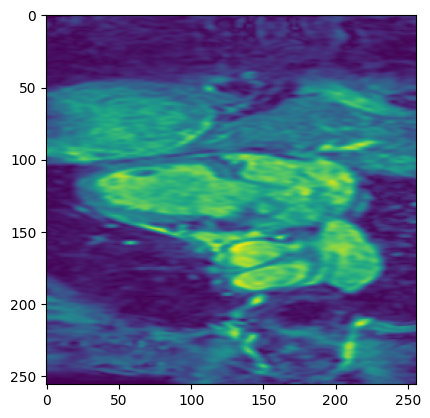

In [ ]:
plt.imshow(Testing_Trans);

In [ ]:
True_Seg = df

In [ ]:
Image_List = []
Label_List = []

for i_img,i_mask in zip(df["image"].values,df["label"].values):

    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)

    X_Images = Reading_Train_NII.get_fdata()
    X_Labels = Reading_Label_NII.get_fdata()

    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.

    Selecting_Image = Selecting_Image.astype("float32")
    Selecting_Label = Selecting_Label.astype("float32")

    Resized_IMG = cv2.resize(Selecting_Image,(256,256))
    Resized_LABEL = cv2.resize(Selecting_Label,(256,256))

    Image_List.append(Resized_IMG)
    Label_List.append(Resized_LABEL)

In [ ]:
print(len(Image_List))
print(len(Label_List))

20
20


In [ ]:
print(np.shape(np.array(Image_List)))
print(np.shape(np.array(Label_List)))

(20, 256, 256)
(20, 256, 256)


Text(0.5, 1.0, 'MASK')

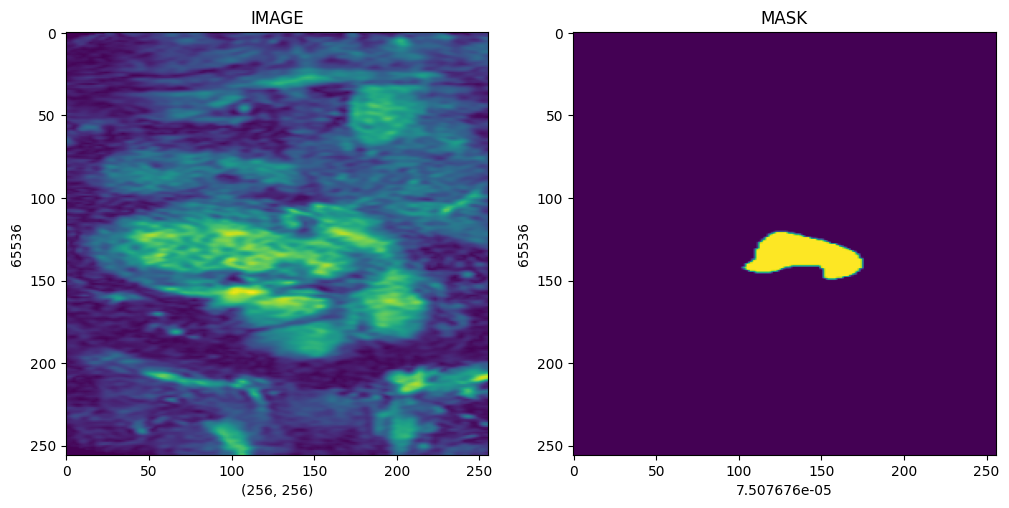

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

In [ ]:
### Coverting image to array
X = np.array(Image_List, dtype="float32")
y = np.array(Label_List,dtype="float32")

In [ ]:
print(X.shape)
print(y.shape)

(20, 256, 256)
(20, 256, 256)


In [ ]:
X_TRAIN = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
X_LABEL = y.reshape(y.shape[0],y.shape[1],y.shape[2],1)

In [ ]:
Y_TRAIN = df['target']

In [ ]:
print(X_TRAIN.shape)
print(X_LABEL.shape)

(20, 256, 256, 1)
(20, 256, 256, 1)


In [ ]:
print(X_TRAIN[0:-1].shape)

(19, 256, 256, 1)


### Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

EncoderModel = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (5, 5), kernel_initializer='he_normal', use_bias=True, name="ENCODER_INPUT"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),

  tf.keras.layers.Conv2D(64, (5, 5), kernel_initializer='he_normal', use_bias=True),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),

  tf.keras.layers.Conv2D(128, (2, 2), kernel_initializer='he_normal', use_bias=True),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),

  tf.keras.layers.Conv2D(128, (2, 2), kernel_initializer='he_normal', use_bias=True),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
])

Decoder = tf.keras.Sequential([
  tf.keras.layers.Conv2DTranspose(128, (2, 2)),
  tf.keras.layers.ReLU(),

  tf.keras.layers.Conv2DTranspose(64, (2, 2)),
  tf.keras.layers.ReLU(),

  tf.keras.layers.Conv2DTranspose(32, (5, 5)),
  tf.keras.layers.ReLU(),

  tf.keras.layers.Conv2DTranspose(1, (5, 5), name="DECODER_OUTPUT"),
])

In [ ]:
AE_Structure = Sequential([EncoderModel,Decoder])

In [ ]:
AE_Structure.compile(loss="binary_crossentropy",optimizer=Adam(lr=0.0000001),metrics=["accuracy"])

In [ ]:
AE_Model = AE_Structure.fit(X_TRAIN,X_LABEL,epochs=10)

Epoch 1/10
1/1 [==============================] - 23s 23s/step - loss: 0.2391 - accuracy: 0.9315
Epoch 2/10
1/1 [==============================] - 1s 729ms/step - loss: 0.0016 - accuracy: 0.9717
Epoch 3/10
1/1 [==============================] - 1s 727ms/step - loss: 0.0016 - accuracy: 0.9717
Epoch 4/10
1/1 [==============================] - 1s 724ms/step - loss: 0.0016 - accuracy: 0.9717
Epoch 5/10
1/1 [==============================] - 1s 723ms/step - loss: 0.0016 - accuracy: 0.9717
Epoch 6/10
1/1 [==============================] - 1s 728ms/step - loss: 0.0016 - accuracy: 0.9717
Epoch 7/10
1/1 [==============================] - 1s 737ms/step - loss: 0.0016 - accuracy: 0.9717
Epoch 8/10
1/1 [==============================] - 1s 723ms/step - loss: 0.0016 - accuracy: 0.9717
Epoch 9/10
1/1 [==============================] - 1s 728ms/step - loss: 0.0016 - accuracy: 0.9717
Epoch 10/10
1/1 [==============================] - 1s 728ms/step - loss: 0.0016 - accuracy: 0.9717


In [ ]:
num_classes = df['target'].nunique()
num_classes

2

In [ ]:
## Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate the images randomly by up to 10 degrees
    width_shift_range=0.1,  # Shift the images horizontally by up to 10% of the total width
    height_shift_range=0.1, # Shift the images vertically by up to 10% of the total height
    shear_range=0.1,        # Apply shear transformation to the images
    zoom_range=0.1,         # Zoom in or out on the images by up to 10%
    horizontal_flip=True,   # Flip the images horizontally
    vertical_flip=True     # Flip the images vertically
)

# Define the number of augmented images that wanted to generate
num_augmented_images = 10

# Generate augmented images and labels
augmented_images = []
augmented_labels = []

for i in range(X_TRAIN.shape[0]):
    image = X_TRAIN[i]
    label = X_LABEL[i]

    # Reshape the image and label for augmentation
    image = np.reshape(image, (1,) + image.shape)
    label = np.reshape(label, (1,) + label.shape)

    # Generate augmented images and labels
    aug_images = datagen.flow(image, batch_size=1, shuffle=False)
    aug_labels = datagen.flow(label, batch_size=1, shuffle=False)

    # Save the augmented images and labels
    for j in range(num_augmented_images):
        augmented_images.append(aug_images.next()[0])
        augmented_labels.append(aug_labels.next()[0])

# Convert the augmented images and labels to arrays
X_augmented = np.array(augmented_images)
y_augmented = np.array(augmented_labels)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate the images randomly by up to 10 degrees
    width_shift_range=0.1,  # Shift the images horizontally by up to 10% of the total width
    height_shift_range=0.1, # Shift the images vertically by up to 10% of the total height
    shear_range=0.1,        # Apply shear transformation to the images
    zoom_range=0.1,         # Zoom in or out on the images by up to 10%
    horizontal_flip=True,   # Flip the images horizontally
    vertical_flip=True     # Flip the images vertically
)

# Define the number of augmented images that wanted to generate
num_augmented_images = 10

# Generate augmented images and labels
augmented_images = []
augmented_labels = []

for i in range(X_TRAIN.shape[0]):
    image = X_TRAIN[i]
    label = X_LABEL[i]

    # Reshape the image and label for augmentation
    image = np.reshape(image, (1,) + image.shape)
    #label = np.reshape(label, (1,) + label.shape)

    # Generate augmented images and labels
    aug_images = datagen.flow(image, batch_size=1, shuffle=False)
    #aug_labels = datagen.flow(label, batch_size=1, shuffle=False)

    # Save the augmented images and labels
    for j in range(num_augmented_images):
        augmented_images.append(aug_images.next()[0])
        augmented_labels.append(label)

# Convert the augmented images and labels to arrays
X_augmented = np.array(augmented_images)
y_augmented = augmented_labels


In [ ]:
print(len(X_augmented)), print(len(y_augmented))


200
200


(None, None)

In [ ]:
X_augmented.shape


(200, 256, 256, 1)

In [ ]:
ser = pd.Series(y_augmented)
#ser.value_counts()

In [ ]:
Y_TRAIN.shape

(20,)

### CNN models

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # Assuming input shape of (batch_size, 10)
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(256, 256, 1)),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
model.summary()

#model.fit(X_TRAIN, Y_TRAIN, epochs=10, batch_size=32)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 252, 252, 32)      832       
                                                                 
 batch_normalization_4 (Batc  (None, 252, 252, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 248, 248, 64)      51264     
                                                                 
 batch_normalization_5 (Batc  (None, 248, 248, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 247, 247, 128)     32896     
                                                                 
 batch_normalization_6 (Batc  (None, 247, 247, 128)   

In [ ]:
history = model.fit(X_TRAIN, Y_TRAIN, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.7435 - accuracy: 0.8000
Epoch 2/10
1/1 [==============================] - 1s 530ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 487ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 486ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 490ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 490ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 520ms/step - loss: 4.5827 - accuracy: 0.9500
Epoch 8/10
1/1 [==============================] - 1s 523ms/step - loss: 46.5835 - accuracy: 0.9000
Epoch 9/10
1/1 [==============================] - 0s 490ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 487ms/step - loss: 0.0000e+00 - accuracy: 

In [ ]:
# Make predictions
y_train_pred = model.predict(X_TRAIN)
y_train_pred = tf.argmax(y_train_pred, axis=1).numpy()

### CNN Evaluation

In [ ]:
confusion_matrix(Y_TRAIN, y_train_pred)

array([[ 2,  0],
       [ 0, 18]])

In [ ]:
print(classification_report(Y_TRAIN, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        18

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



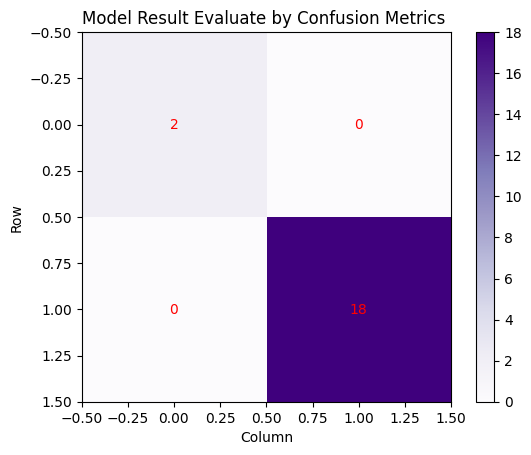

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

array = np.array([[2, 0], [0, 18]])

plt.imshow(array, cmap='Purples')
plt.colorbar()

# Display the values on the plot
rows, cols = array.shape
for i in range(rows):
    for j in range(cols):
        plt.text(j, i, str(array[i, j]), ha='center', va='center', color='RED')

plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Model Result Evaluate by Confusion Metrics ')
plt.show()


1/1 [==============================] - 0s 23ms/step


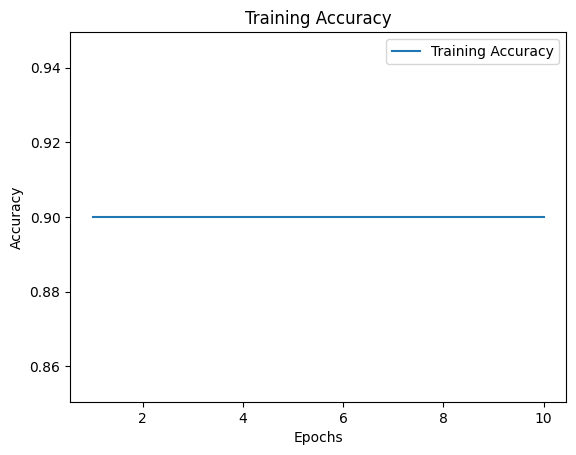

In [ ]:
# Calculate training accuracy at each epoch
train_accuracy = []
for epoch in range(1, 11):
    y_train_pred = model.predict(X_TRAIN)
    y_train_pred = np.argmax(y_train_pred, axis=1)
    accuracy = np.mean(y_train_pred == Y_TRAIN)
    train_accuracy.append(accuracy)

# Plot training vs prediction accuracy
epochs = range(1, 11)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 34ms/step


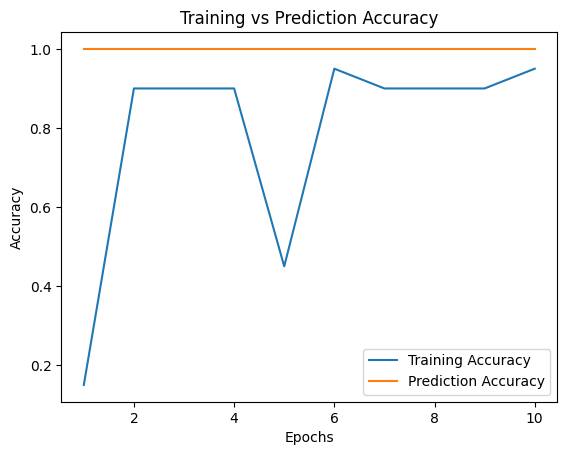

In [ ]:
import matplotlib.pyplot as plt

# Make predictions
# Make predictions
y_train_pred = model.predict(X_TRAIN)
y_train_pred = tf.argmax(y_train_pred, axis=1).numpy()

# Calculate accuracy
train_accuracy = (y_train_pred == Y_TRAIN).mean()

# Evaluate the model
loss, accuracy = model.evaluate(X_TRAIN, Y_TRAIN, verbose=0)

# Plot training vs prediction accuracy
epochs = range(1, 11)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, [train_accuracy] * len(epochs), label='Prediction Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Prediction Accuracy')
plt.legend()
plt.show()

### RNN MODEl

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
    tf.keras.layers.Reshape((256, 256)),  # Reshape input to match sequence length

    tf.keras.layers.LSTM(64, return_sequences=True),  # LSTM layer

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.build(input_shape=(None, 256, 256, 1))  # Build the model with a specific input shape
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
model.summary()

In [ ]:
history = model.fit(X_TRAIN, Y_TRAIN, epochs=10, batch_size=32)

In [ ]:
# Make predictions
y_train_pred = model.predict(X_TRAIN)
y_train_pred = tf.argmax(y_train_pred, axis=1).numpy()

### RNN Evaluation

In [ ]:
confusion_matrix(Y_TRAIN, y_train_pred)

array([[ 2,  0],
       [ 0, 18]])

In [ ]:
print(classification_report(Y_TRAIN, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        18

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



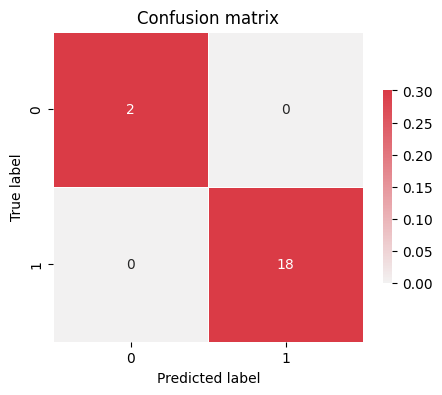

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(Y_TRAIN, y_train_pred)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cm, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt="d")

plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()


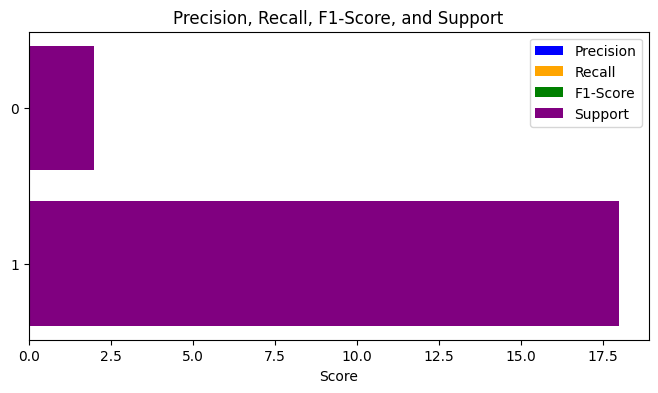

In [ ]:
import matplotlib.pyplot as plt

# Define the data
precision = [1.00, 0.95]
recall = [0.50, 1.00]
f1_score = [0.67, 0.97]
support = [2, 18]
labels = ['0', '1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))
y_pos = range(len(labels))

ax.barh(y_pos, precision, color='blue', label='Precision')
ax.barh(y_pos, recall, color='orange', label='Recall')
ax.barh(y_pos, f1_score, color='green', label='F1-Score')
ax.barh(y_pos, support, color='purple', label='Support')

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.legend()
ax.set_xlabel('Score')
ax.set_title('Precision, Recall, F1-Score, and Support')

plt.show()


1/1 [==============================] - 0s 36ms/step


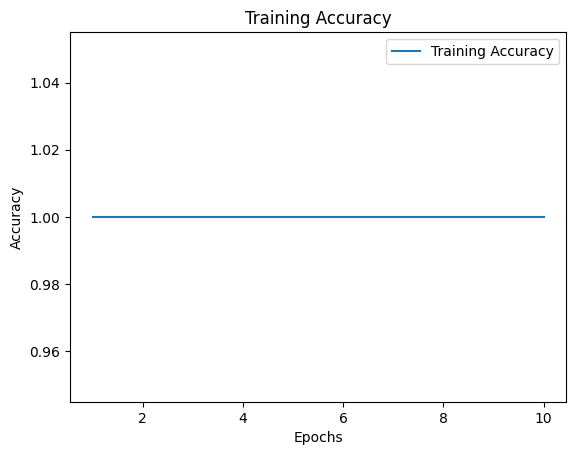

In [ ]:
# Calculate training accuracy at each epoch
train_accuracy = []
for epoch in range(1, 11):
    y_train_pred = model.predict(X_TRAIN)
    y_train_pred = np.argmax(y_train_pred, axis=1)
    accuracy = np.mean(y_train_pred == Y_TRAIN)
    train_accuracy.append(accuracy)

# Plot training vs prediction accuracy
epochs = range(1, 11)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 39ms/step


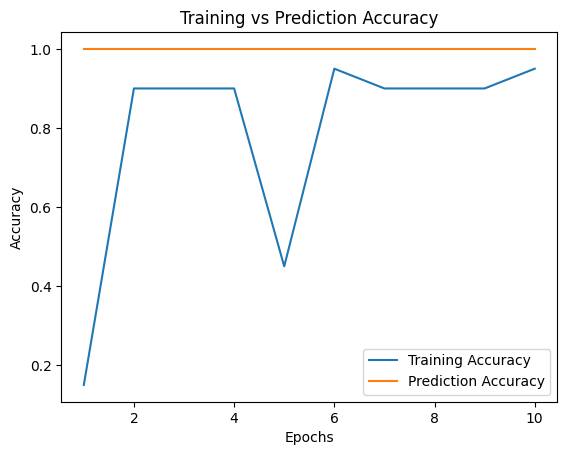

In [ ]:
# Make predictions
# Make predictions
y_train_pred = model.predict(X_TRAIN)
y_train_pred = tf.argmax(y_train_pred, axis=1).numpy()

# Calculate accuracy
train_accuracy = (y_train_pred == Y_TRAIN).mean()

# Plot training vs prediction accuracy
epochs = range(1, 11)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, [train_accuracy] * len(epochs), label='Prediction Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Prediction Accuracy')
plt.legend()
plt.show()